In [1]:
#Reference https://www.youtube.com/watch?v=tnaq2Ao4KBE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month']  = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


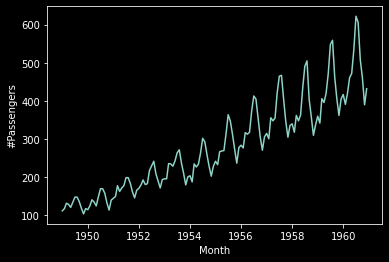

In [4]:
sns.lineplot(data=df, x='Month', y='#Passengers')

In [5]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print(f'p-value = {pvalue}; if above 0.05 the date is likelly NOT stationary')

p-value = 0.9918802434376411; if above 0.05 the date is likelly NOT stationary


In [6]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
df.head()

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May


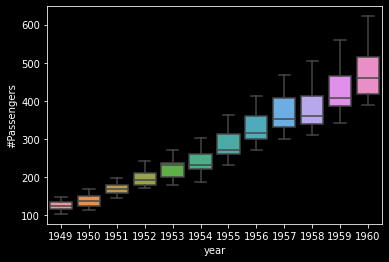

In [7]:
sns.boxplot(data=df, x='year', y='#Passengers' )

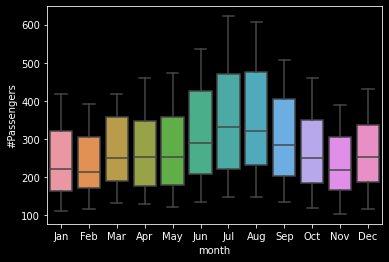

In [8]:
sns.boxplot(data=df, x='month', y='#Passengers' )

In [9]:
decomposed = seasonal_decompose(df['#Passengers'], model='additive')

In [10]:
trend = decomposed.trend
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [11]:
seassonal = decomposed.seasonal
seassonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [12]:
residual = decomposed.resid
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

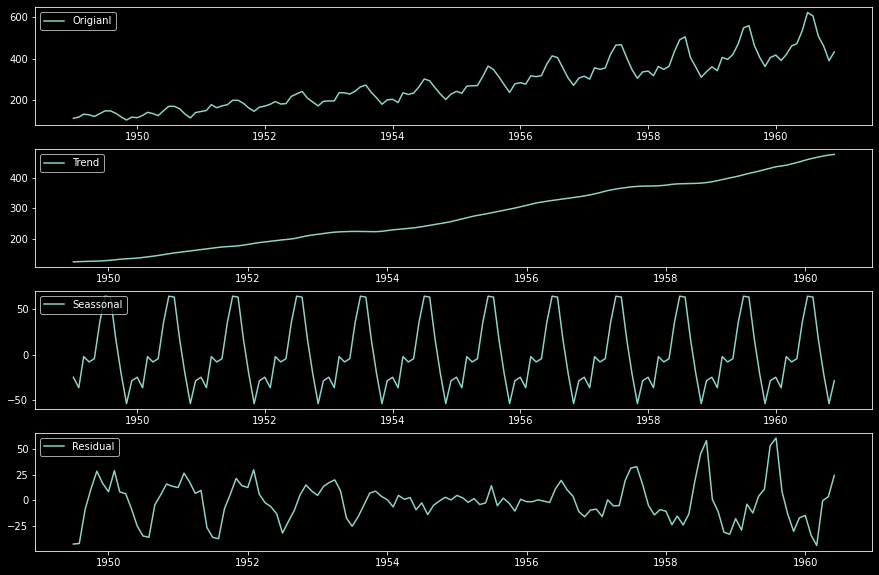

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df['#Passengers'], label= 'Origianl')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label= 'Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seassonal, label= 'Seassonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label= 'Residual')
plt.legend(loc='upper left')

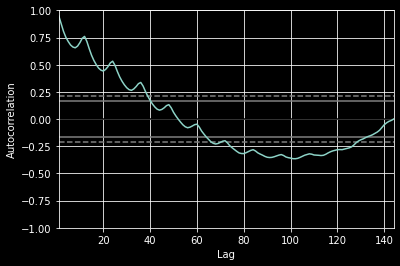

In [14]:
pd.plotting.autocorrelation_plot(df['#Passengers'])